In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot  as plt
import plotly.express as px

In [2]:
df = pd.read_csv('/kaggle/input/indian-food-dataset-with/Ifood_new.csv')
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,img_url
0,Adhirasam,"Rice flour, jaggery, ghee, vegetable oil, elachi",vegetarian,10,50,sweet,dessert,West Bengal,East,https://www.crazymasalafood.com/wp-content/ima...
1,Aloo gobi,"Cauliflower, potato, garam masala, turmeric, c...",vegetarian,10,20,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
2,Aloo matar,"Potato, peas, chillies, ginger, garam masala, ...",vegetarian,5,40,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
3,Aloo methi,"Potato, fenugreek leaves, chillies, salt, oil",vegetarian,10,40,bitter,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
4,Aloo shimla mirch,"Potato, shimla mirch, garam masala, amchur pow...",vegetarian,10,40,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...


In [3]:
# don't need img column for now so dropping it 
drop_col=['img_url']
df=df.drop(drop_col,axis=1)
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Adhirasam,"Rice flour, jaggery, ghee, vegetable oil, elachi",vegetarian,10,50,sweet,dessert,West Bengal,East
1,Aloo gobi,"Cauliflower, potato, garam masala, turmeric, c...",vegetarian,10,20,spicy,main course,Punjab,North
2,Aloo matar,"Potato, peas, chillies, ginger, garam masala, ...",vegetarian,5,40,spicy,main course,Punjab,North
3,Aloo methi,"Potato, fenugreek leaves, chillies, salt, oil",vegetarian,10,40,bitter,main course,Punjab,North
4,Aloo shimla mirch,"Potato, shimla mirch, garam masala, amchur pow...",vegetarian,10,40,spicy,main course,Punjab,North


In [4]:
#no.of rows and columns
df.shape

(255, 9)

In [5]:
#about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [6]:
# Checking the column names to confirm
df.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [7]:
#missing Values
df.isna().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [8]:
df['flavor_profile'].value_counts()

flavor_profile
spicy     133
sweet      88
-1         29
bitter      4
sour        1
Name: count, dtype: int64

In [9]:
df['course'].value_counts()

course
main course    129
dessert         85
snack           39
starter          2
Name: count, dtype: int64

In [10]:
df['state'].value_counts()

state
Gujarat            35
Punjab             33
Maharashtra        30
West Bengal        24
-1                 24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Odisha              7
Kerala              7
Rajasthan           6
Karnataka           6
Telangana           5
Goa                 3
Bihar               3
Manipur             2
Jammu & Kashmir     2
Madhya Pradesh      2
NCT of Delhi        1
Chhattisgarh        1
Nagaland            1
Haryana             1
Tripura             1
Uttarakhand         1
Name: count, dtype: int64

In [11]:
df['region'].value_counts()

region
West          73
South         58
North         50
East          32
North East    25
-1            13
Central        3
Name: count, dtype: int64

In [12]:
df['diet'].value_counts()

diet
vegetarian        227
non vegetarian     28
Name: count, dtype: int64

In [13]:
#group by 
df_region = df.groupby('region')['flavor_profile'].value_counts()
df_region

region      flavor_profile
-1          spicy              6
            sweet              5
            -1                 2
Central     spicy              2
            sweet              1
East        sweet             23
            spicy              6
            -1                 3
North       spicy             36
            sweet             10
            bitter             2
            -1                 2
North East  spicy             13
            sweet              7
            -1                 5
South       spicy             29
            sweet             19
            -1                10
West        spicy             41
            sweet             22
            -1                 7
            bitter             2
            sour               1
Name: count, dtype: int64

In [14]:
# Calculating total time as sum of preparation and cooking time
df['process_time'] = df['prep_time'] + df['cook_time']

# Sorting dishes by total time and getting the top 10 most time-consuming dishes
complex_dishes = df[['name', 'prep_time', 'cook_time', 'process_time']].sort_values(by='process_time', ascending=False).head(10)
complex_dishes

,name,prep_time,cook_time,process_time
229,Shrikhand,10,720,730
193,Pindi chana,500,120,620
204,Puttu,495,40,535
156,Misti doi,480,30,510
148,Masala Dosa,360,90,450
65,Dosa,360,90,450
86,Idli,360,90,450
197,Poornalu,240,60,300
31,Chak Hao Kheer,240,45,285
239,Tandoori Fish Tikka,240,30,270


In [15]:
pf=df[df['process_time']>1]
pf=pf.sort_values(by=['process_time'])


In [16]:
print('top items which have low processing time')
print(pf.head()[['name','process_time']])

top items which have low processing time
          name  process_time
135      Lassi            10
179      Papad            10
180    Papadum            10
114     Khichu            15
175  Pani puri            17


In [17]:
print('top 5 items which have high processing time')
print(pf.tail()[['name','process_time']])

top 5 items which have high processing time
            name  process_time
65          Dosa           450
156    Misti doi           510
204        Puttu           535
193  Pindi chana           620
229    Shrikhand           730


<function matplotlib.pyplot.show(close=None, block=None)>

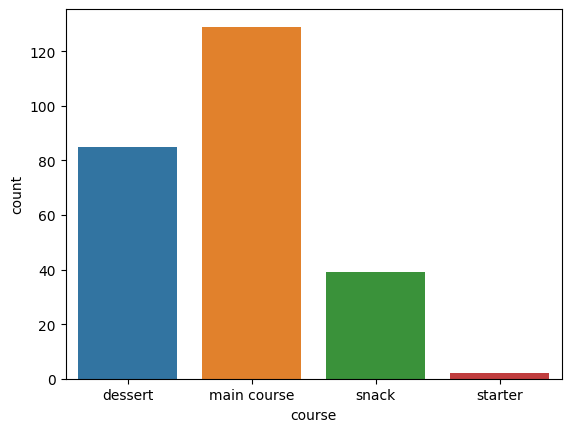

In [18]:
#Visualization
sns.countplot(x='course',data=df)
plt.show

In [19]:
rc=df.groupby('region',as_index=False)['name'].count()
print(rc)
fig=px.pie(rc,values='name',names='region')
fig.show()

       region  name
0          -1    13
1     Central     3
2        East    32
3       North    50
4  North East    25
5       South    58
6        West    73


In [20]:
rc=df.groupby('flavor_profile',as_index=False)['name'].count()
print(rc)
fig=px.pie(rc,values='name',names='flavor_profile')
fig.show()

  flavor_profile  name
0             -1    29
1         bitter     4
2           sour     1
3          spicy   133
4          sweet    88


<function matplotlib.pyplot.show(close=None, block=None)>

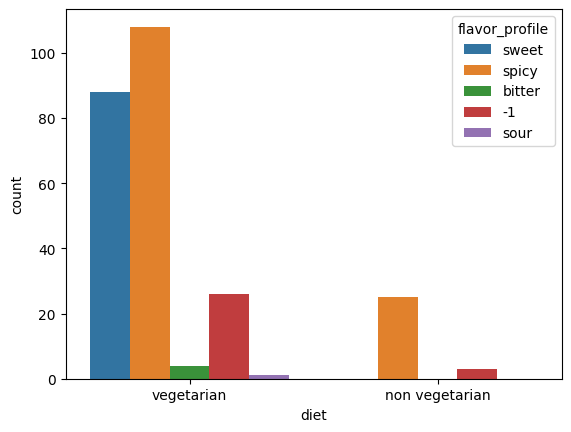

In [21]:
sns.countplot(data=df,x='diet',hue='flavor_profile')
plt.show

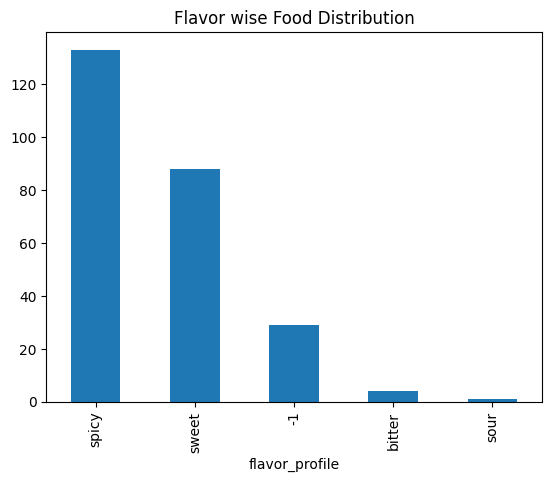

In [22]:
df.flavor_profile.value_counts().plot(kind='bar')
plt.title('Flavor wise Food Distribution')
plt.show()

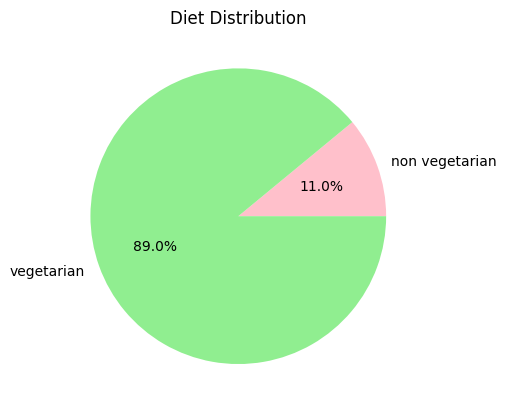

In [23]:

labels,freq = np.unique(df.diet.values,return_counts=True)
colors = ['pink','lightgreen']
plt.pie(freq,labels=labels,autopct = '%1.1f%%',colors=colors)
plt.title('Diet Distribution')
plt.show()

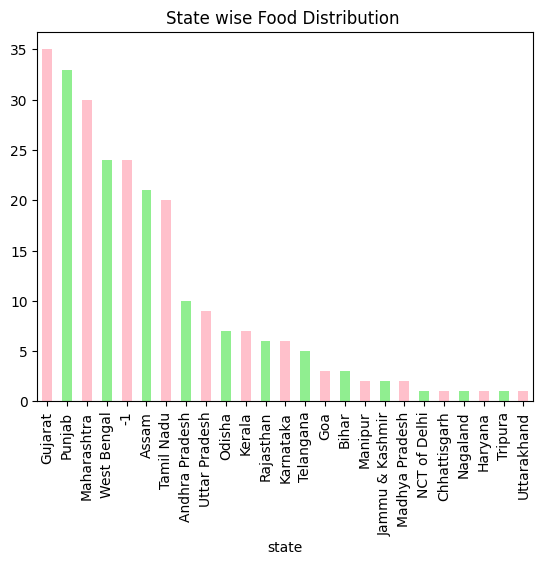

In [24]:

df['state'].value_counts().plot(kind='bar',color=colors)
plt.title('State wise Food Distribution ')
plt.show()

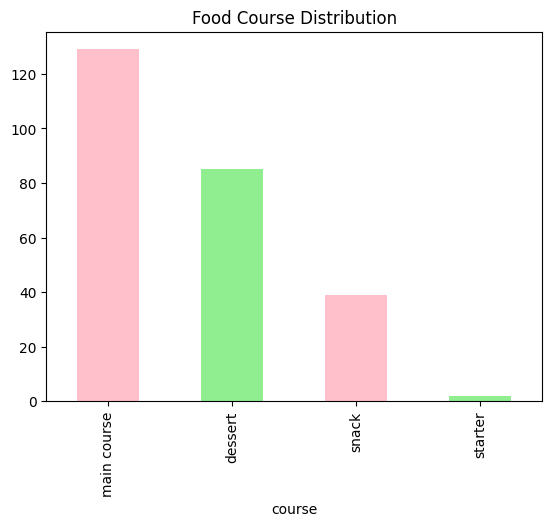

In [25]:

df.course.value_counts().plot(kind='bar',color=colors)
plt.title('Food Course Distribution')
plt.show()

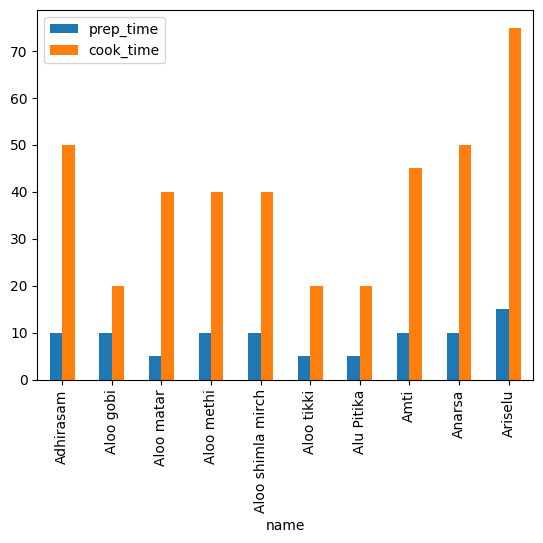

In [26]:
name_and_time = df[['name', 'prep_time', 'cook_time']].head(10)
name_and_time.plot.bar(x='name', y=['prep_time', 'cook_time'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

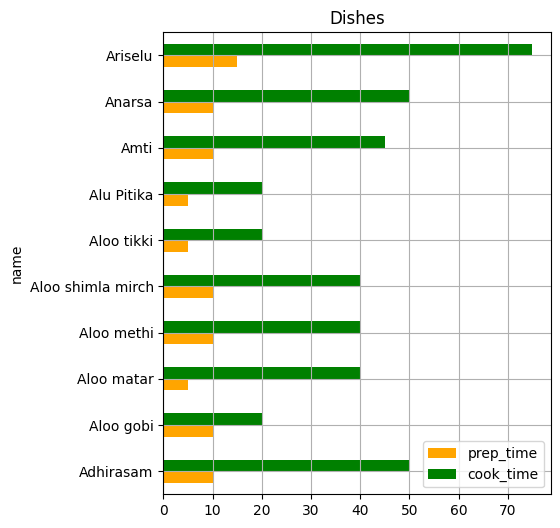

In [27]:
# horizontal bar chart with grid 
name_and_time.plot.barh(x='name',color =['orange', 'green'], title = "Dishes", grid = True, figsize=(5,6), legend = True)
plt.show

<Axes: xlabel='cook_time', ylabel='prep_time'>

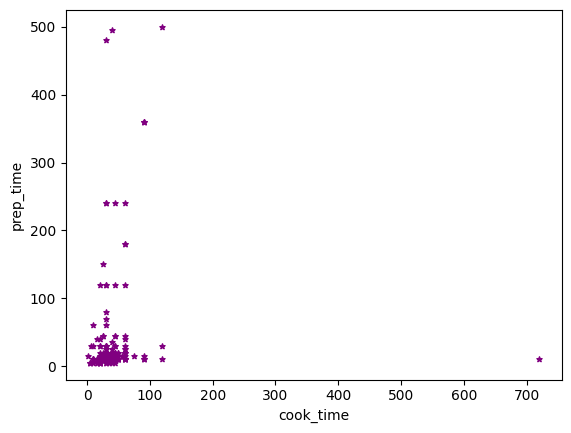

In [28]:
#scatter Plot
data = df[(df.cook_time!=-2) & (df.prep_time!=-1)]
data.plot.scatter(x='cook_time', y='prep_time', s = 15, c='purple', marker= '*')

### Line PLot
df['cook_time'].plot()

<Axes: >

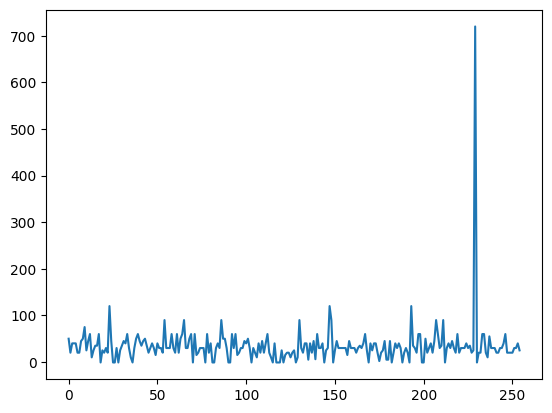

In [29]:
# Line Plot
df['cook_time'].plot()

In [30]:
import statistics as st
from statistics import median
from statistics import mode

In [31]:
data= df['process_time'] = df['prep_time'] + df['cook_time']


In [32]:
print(st.mean(data))

65.63529411764706


In [33]:
print(st.median(data))

50


In [34]:
print(st.mode(data))

50


In [35]:
print(st.variance(data))

8603.05150532654


In [36]:
print(st.stdev(data))

92.75263610985157


In [37]:
data1= df['prep_time']

In [38]:
print(st.covariance(data,data1))

5768.810421491431


In [39]:
print(st.correlation(data,data1))


0.8572276993487228


In [40]:
pip install --upgrade scipy

Note: you may need to restart the kernel to use updated packages.


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy

In [42]:
data= df['process_time'] = df['prep_time'] + df['cook_time']
data.head(5)


0    60
1    30
2    45
3    50
4    50
dtype: int64

In [43]:
from scipy import stats
from statsmodels.stats.anova import anova_lm
from scipy.stats import f_oneway
s1=df['process_time']
s2=df['prep_time'] 
s3=df['cook_time']


a = 0.05
res = f_oneway(s1,s2,s3)
print(res)

F_onewayResult(statistic=17.094525078533245, pvalue=5.4660258809022566e-08)


In [44]:
if res[1] < a:
    print('reject null hypothesis')
else:
    print('null cannot be rejected')

reject null hypothesis


In [45]:
from scipy.stats import skew
print(skew(df['process_time'],axis=0,bias=True))

4.301849428197


In [46]:
from scipy.stats import skew
print(skew(df['prep_time'],axis=0,bias=True))

4.60898388128749


In [47]:
from scipy.stats import skew
print(skew(df['cook_time'],axis=0,bias=True))

11.366063906426927


<Axes: xlabel='process_time', ylabel='Density'>

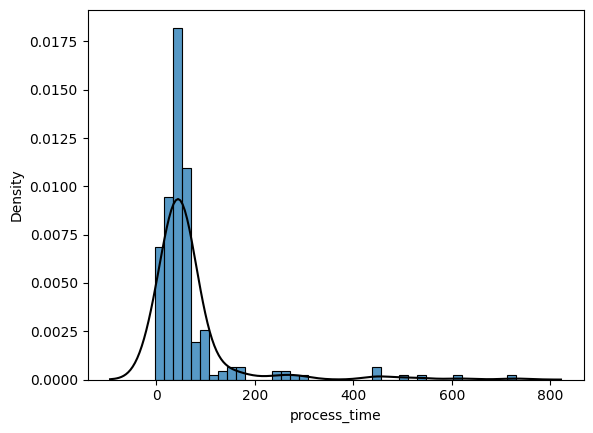

In [48]:
sns.histplot(df['process_time'],stat='density',bins=40)
sns.kdeplot(df['process_time'],color='black')

<Axes: xlabel='prep_time', ylabel='Density'>

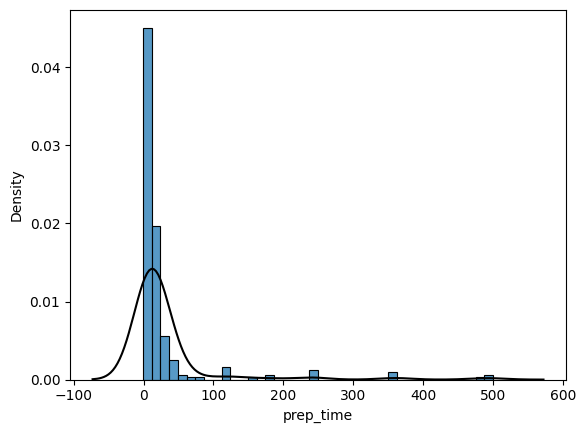

In [49]:
sns.histplot(df['prep_time'],stat='density',bins=40)
sns.kdeplot(df['prep_time'],color='black')

<Axes: xlabel='cook_time', ylabel='Density'>

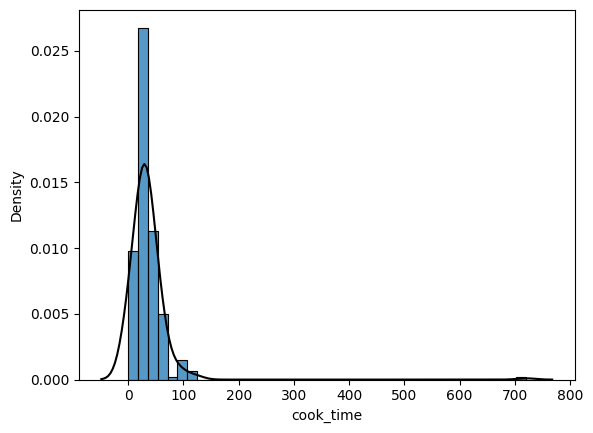

In [50]:
sns.histplot(df['cook_time'],stat='density',bins=40)
sns.kdeplot(df['cook_time'],color='black')